Observability toward the coalescent horizon
==
Spectral analysis of the $\boldsymbol{\mathcal{L}}(\eta)$ operator

In [1]:
import mushi
from mushi import utils

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.linalg import svd

In [2]:
# enable latex in plots
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

## Define a simple bottleneck demography $\eta(t)$

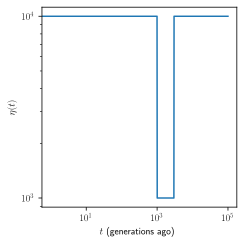

In [3]:
# time grid
t = np.concatenate(([0], np.logspace(0, 5, 1000), [np.inf]))
# η(t) values in each epoch
y = 1e4 * np.ones(len(t) - 1)
y[np.less(1000, t[:-1]) & np.less(t[:-1], 3000)] = 1e3
# histories object
eta = mushi.eta(t[1:-1], y)

plt.figure(figsize=(3.5, 3.5))
eta.plot()
plt.show()

## Singular value spectrum of $\mathbf{L}(\mathbf y)$ with $n=200$

In [4]:
n = 200
L = utils.C(n) @ utils.M(n, t, y)
U, σ, Vh = svd(L, full_matrices=False)

/Users/williamdewitt/Applications/miniconda2/envs/mushidocs/lib/python3.7/site-packages/jax/lib/xla_bridge.py:116: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


Top few right singular vectors

In [5]:
df = pd.DataFrame(Vh.T, index=pd.Index(t[:-1], name='time'))
df = df.melt().set_index('variable')
df['singular value'] = σ[df.index]
df['$t$ (generations ago)'] = np.tile(t[:-1], df.index[-1] + 1)

# filter to top few singular values
keep = 20
df = df[(df.index % 1 == 0) & (df.index < keep)]

palette = sns.color_palette("coolwarm", n_colors=df['singular value'].nunique())

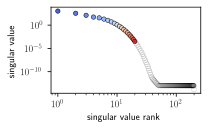

In [6]:
x = np.arange(1, min(n, eta.m + 1))
plt.figure(figsize=(3, 1.9))
plt.scatter(x[:keep], σ[:keep], c=palette, edgecolors='k', linewidths=.5, s=20)
plt.plot(x[keep:], σ[keep:], 'ko', ms=5, mfc='none', mew=.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('singular value rank')
plt.ylabel('singular value')
plt.tight_layout()
plt.show()

## Eigenfunction amplitudes

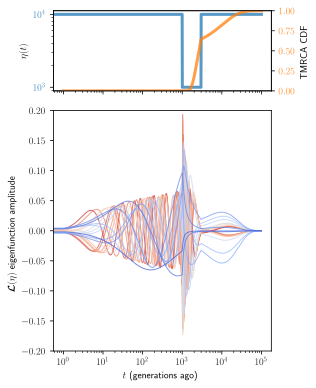

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(4.5, 5.5), gridspec_kw={'height_ratios': [1, 3]})
plt.sca(axes[0])
eta.plot(lw=3, alpha=0.75)
plt.tick_params(axis='y', labelcolor='C0')
plt.xlabel('')
ax2 = axes[0].twinx()
plt.sca(ax2)
plt.plot(eta.change_points, mushi.kSFS(n=n).tmrca_cdf(eta), color='C1', lw=3, alpha=0.75)
plt.ylim([0, 1])
plt.ylabel('TMRCA CDF')
plt.tick_params(axis='y', labelcolor='C1')
plt.sca(axes[1])
ax = sns.lineplot(x=r'$t$ (generations ago)', y='value', hue='singular value', units='singular value',
                  data=df, estimator=None,
                  palette=palette[::-1],
                  legend=False, alpha=.75, lw=1)
plt.ylabel(r'$\boldsymbol{\mathcal{L}}(\eta)$ eigenfunction amplitude')
plt.xscale('log')
plt.ylim([-.2, .2])
plt.tight_layout()
plt.show()